In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.io as ascii
from astropy.io import fits
from scipy.optimize import curve_fit
import os
import nkrpy
from importlib import reload
from nkrpy import atomiclines
from nkrpy import constants
from nkrpy.miscmath import *
atomiclines = reload(nkrpy.atomiclines)
llines = atomiclines.lines()
listoflines = atomiclines.call(wtype='nir',bu='microns').return_lines()

# Pretty Plotting

In [2]:
def plotting(ax,xmin,xmax,x,y,tempsource,line,count,start=False):
    colours = ['orange','black','blue','red',\
              'green','grey','purple']
    colour = colours[count%len(colours)]
    y = np.array(y)
    x = np.array(x)
    origx = x.copy()
    origy = y.copy()
    x = x[~np.isnan(origy)]
    y = y[~np.isnan(origy)]
     
    print("Count: {},Before: {},{}".format(count,x.shape,y.shape))
    if start == False:
        temp = []
        if count == 0:
            for i,j in enumerate(x):
                if (j < 1.7):
                    temp.append(i)
        elif count == 1:
            for i,j in enumerate(x):
                if ((1.75 < j) or (j < 1.5)):
                    temp.append(i)
        elif count == 2:
            for i,j in enumerate(x):
                if (1.33 < j) or (j < 1.17):
                    temp.append(i)
        elif count == 3:
            for i,j in enumerate(x):
                if ((j < 1.05) or ((1.11<j)) and (j<1.17)): 
                    temp.append(i)
        elif count == 4:
            for i,j in enumerate(x):
                if (j < 0.95):
                    temp.append(i)
        temp = np.array(temp)
        temp.sort()
        tempx = np.delete(x,temp)
        tempy = np.delete(y,temp)
        lin = False
        if lin:
            expected = [1.,1.]
            fun = linear
        else:
            expected = [1.,1.,1.]
            fun = quad
            
        params,cov = curve_fit(fun,tempx,tempy,expected)
        #print(params)
        if len(temp) > 0:
            y[temp[0]] = fun(x[temp[0]],*params)
            y[temp[len(temp)-1]] = fun(x[temp[len(temp)-1]],*params)
            x = np.delete(x,temp[1:len(temp)-1])
            y = np.delete(y,temp[1:len(temp)-1])

            print("After: {},{}".format(x.shape,y.shape))
        if x.shape[0] == 0:
            x = origx
            y = origy
        count +=1
    ax.plot(x,y,'-',color=colour,label=tempsource[-6:])
    for f in line:
        #print(f)
        if f == 'brg':
            naming = r'Br $\gamma$'
        elif f == 'pab':
            naming = r'Pa $\beta$'
        elif f == 'pag':
            naming = r'Pa $\gamma$'
        else:
            naming = f
        for pl,pj in enumerate(line[f]):
            #print(pl,pj)
            if (pl < (len(line[f]))):
                if pj > 100:
                    pj = pj/10000
                val = int(int(min(range(len(x)),key=lambda i:abs(x[i]-pj))))
                if (xmin <= pj <= xmax )and (min(x) <= pj <= max(x) ):
                    if 10<=val<len(x)-11:
                        region=y[val-10:val+10] 
                    elif val > 0:
                        region=y[val:val+10]
                    elif val<len(x)-1:
                        region=y[val-10:val]
                    else:
                        region = y[val]
                    try:
                        linepos = max(region)
                    except ValueError:
                        linepos = 5*np.nanmean(x)
                    ax.text(pj, linepos*1.05, naming,
                        verticalalignment='bottom',
                        horizontalalignment='center',
                        fontsize=10, color='red',rotation='vertical')

                    ax.plot((pj,pj),(linepos,linepos*1.05),'r-')

<IPython.core.display.Javascript object>


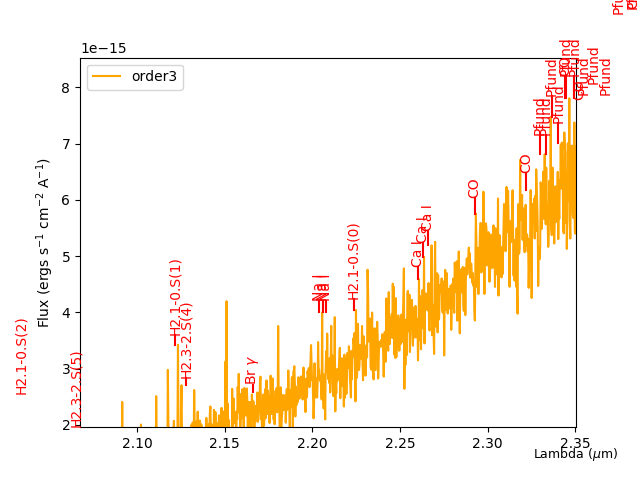

/net/ryle/myhome1/reynolds/programs/ryle-linuxbrew/opt/python/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/net/ryle/myhome1/reynolds/programs/ryle-linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/net/ryle/myhome1/reynolds/programs/ryle-linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


(3, 2048)
Count: 0,Before: (2047,),(2047,)


In [3]:
%matplotlib notebook
source = 'Per-emb-49'
if not os.path.isdir(source):
    os.mkdir(source)
listoffiles='Per-emb-49_tellcor.fits'
# make sure you add statement for naming
f,ax1 = plt.subplots(1,sharey=True,facecolor='w')
plt.text(1., 1.02, source,
         horizontalalignment='center',
         fontsize=20)
count = 0
start=False
orderlim=5
xmin1=1.95
xmax1=2.5
ymin = 0.2E-17
ymax = 1.5E-14
ax1.set_xlim(xmin1,xmax1)
ax1.tick_params(labelright='off')
ax1.set_ylabel(r"Flux (ergs s$^{-1}$ cm$^{-2}$ A$^{-1}$)")
label = ax1.set_xlabel(r'Lambda ($\mu$m)', fontsize = 9)
ax1.xaxis.set_label_coords(1., -0.05)
plt.ylim(ymin,ymax)
hdulist = fits.open(listoffiles)
print(hdulist[0].data.shape)
lam = hdulist[0].data[0,:]
flux = hdulist[0].data[1,:]
eflux = hdulist[0].data[2,:]
plotting(ax1,xmin1,xmax1,lam,flux,source+"_order"+str(3),listoflines,count,start)

plt.subplots_adjust(wspace=0, hspace=0)
ax1.legend()
plt.savefig(source+'/'+source+'_combined.pdf',dpi=1000)

<IPython.core.display.Javascript object>


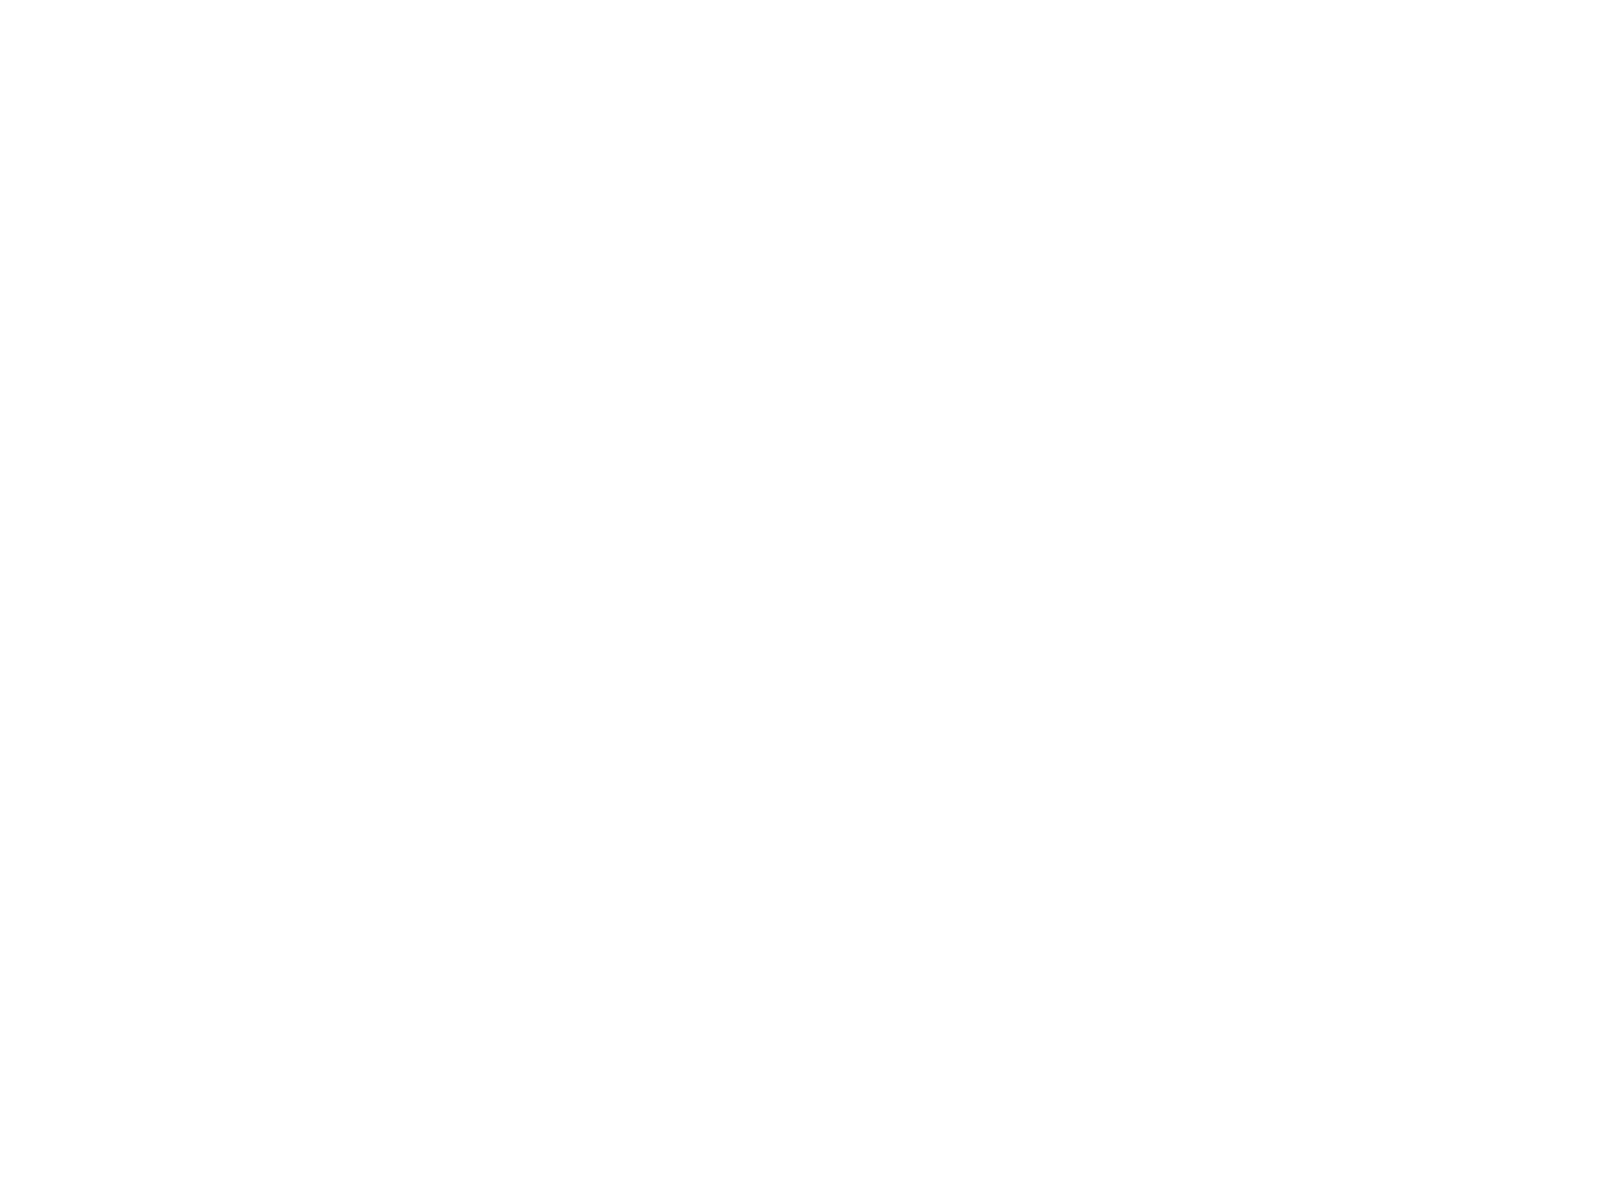

Count: 0,Before: (2047,),(2047,)


In [4]:
f,ax1 = plt.subplots(1, figsize=[16,12],facecolor='w')
count = 0
start=True
ax1.set_xlim(xmin1,xmax1)
ax1.set_ylabel(r"Flux (ergs s$^{-1}$ cm$^{-2}$ A$^{-1}$)")
label = ax1.set_xlabel(r'Lambda ($\mu$m)', fontsize = 9)
plt.ylim(ymin,ymax)
hdulist = fits.open(listoffiles)
lam = hdulist[0].data[0,:]
flux = hdulist[0].data[1,:]
eflux = hdulist[0].data[2,:]
plotting(ax1,xmin1,xmax1,lam,flux,source+"_order"+str(3),listoflines,count,start)

plt.subplots_adjust(wspace=0, hspace=0)
plt.draw()
ax1.legend()
plt.savefig(source+'/'+source+'_combined.raw.pdf',dpi=1000)

# Flatten

In [8]:
def plotting2(ax,xmin,xmax,x,y,tempsource,line,count,start=False):
    colour = ['orange','black','blue','green','purple'][count]
    y = np.array(y)
    x = np.array(x)
    origx = x.copy()
    origy = y.copy()
    x = x[~np.isnan(origy)]
    y = y[~np.isnan(origy)]
     
    print("Count: {},Before: {},{}".format(count,x.shape,y.shape))
    if start == False:
        temp = []
        if count == 0:
            for i,j in enumerate(x):
                if (j < 2.) or (j > 2.4):
                    temp.append(i)
        elif count == 1:
            for i,j in enumerate(x):
                if ((1.75 < j) or (j < 1.6)):
                    temp.append(i)
        elif count == 2:
            for i,j in enumerate(x):
                if (1.33 < j) or (j < 1.17):
                    temp.append(i)
        elif count == 3:
            for i,j in enumerate(x):
                if ((j < 1.05) or ((1.11<j)) and (j<1.17)): 
                    temp.append(i)
        elif count == 4:
            for i,j in enumerate(x):
                if (j < 0.95):
                    temp.append(i)
        temp = np.array(temp)
        temp.sort()
        tempx = np.delete(x,temp)
        tempy = np.delete(y,temp)   
        lin = False
        if lin:
            expected = [1.,1.]
            fun = linear
        else:
            expected = [1.,1.,1.]
            fun = quad
            
        params,cov = curve_fit(fun,tempx,tempy,expected)
        #print(params)
        if len(temp) > 0:
            y[temp[0]] = fun(x[temp[0]],*params)
            y[temp[len(temp)-1]] = fun(x[temp[len(temp)-1]],*params)

            x = np.delete(x,temp)
            y = np.delete(y,temp)
    print('Flatten params: {}'.format(params))
    y = np.array([y[i]/fun(x[i],*params) for i in range(len(x))])
    
    print("After: {},{}".format(x.shape,y.shape))
    if x.shape[0] == 0:
        x = origx
        y = origy
    count +=1
    ax.plot(x,y,'-',color=colour,label=tempsource[-6:])
    #ax.plot(x,linear(x,*params),label='Flatten')
    for f in line:
        #print(f)
        if f == 'brg':
            naming = r'Br $\gamma$'
        elif f == 'pab':
            naming = r'Pa $\beta$'
        elif f == 'pag':
            naming = r'Pa $\gamma$'
        else:
            naming = f
        for pl,pj in enumerate(line[f]):
            if (pl < (len(line[f]))):
                if pj > 100:
                    pj = pj/10000
                val = int(int(min(range(len(x)),key=lambda i:abs(x[i]-pj))))
                if (xmin <= pj <= xmax )and (min(x) <= pj <= max(x) ):
                    if 10<=val<len(x)-11:
                        region=y[val-10:val+10] 
                    elif val > 0:
                        region=y[val:val+10]
                    elif val<len(x)-1:
                        region=y[val-10:val]
                    else:
                        region = y[val]
                    try:
                        linepos = max(region)
                    except ValueError:
                        linepos = 5*np.nanmean(x)
                    ax.text(pj, linepos*1.05, naming,
                        verticalalignment='bottom',
                        horizontalalignment='center',
                        fontsize=25, color='red',rotation='vertical')

                    ax.plot((pj,pj),(linepos,linepos*1.05),'r-')

<IPython.core.display.Javascript object>


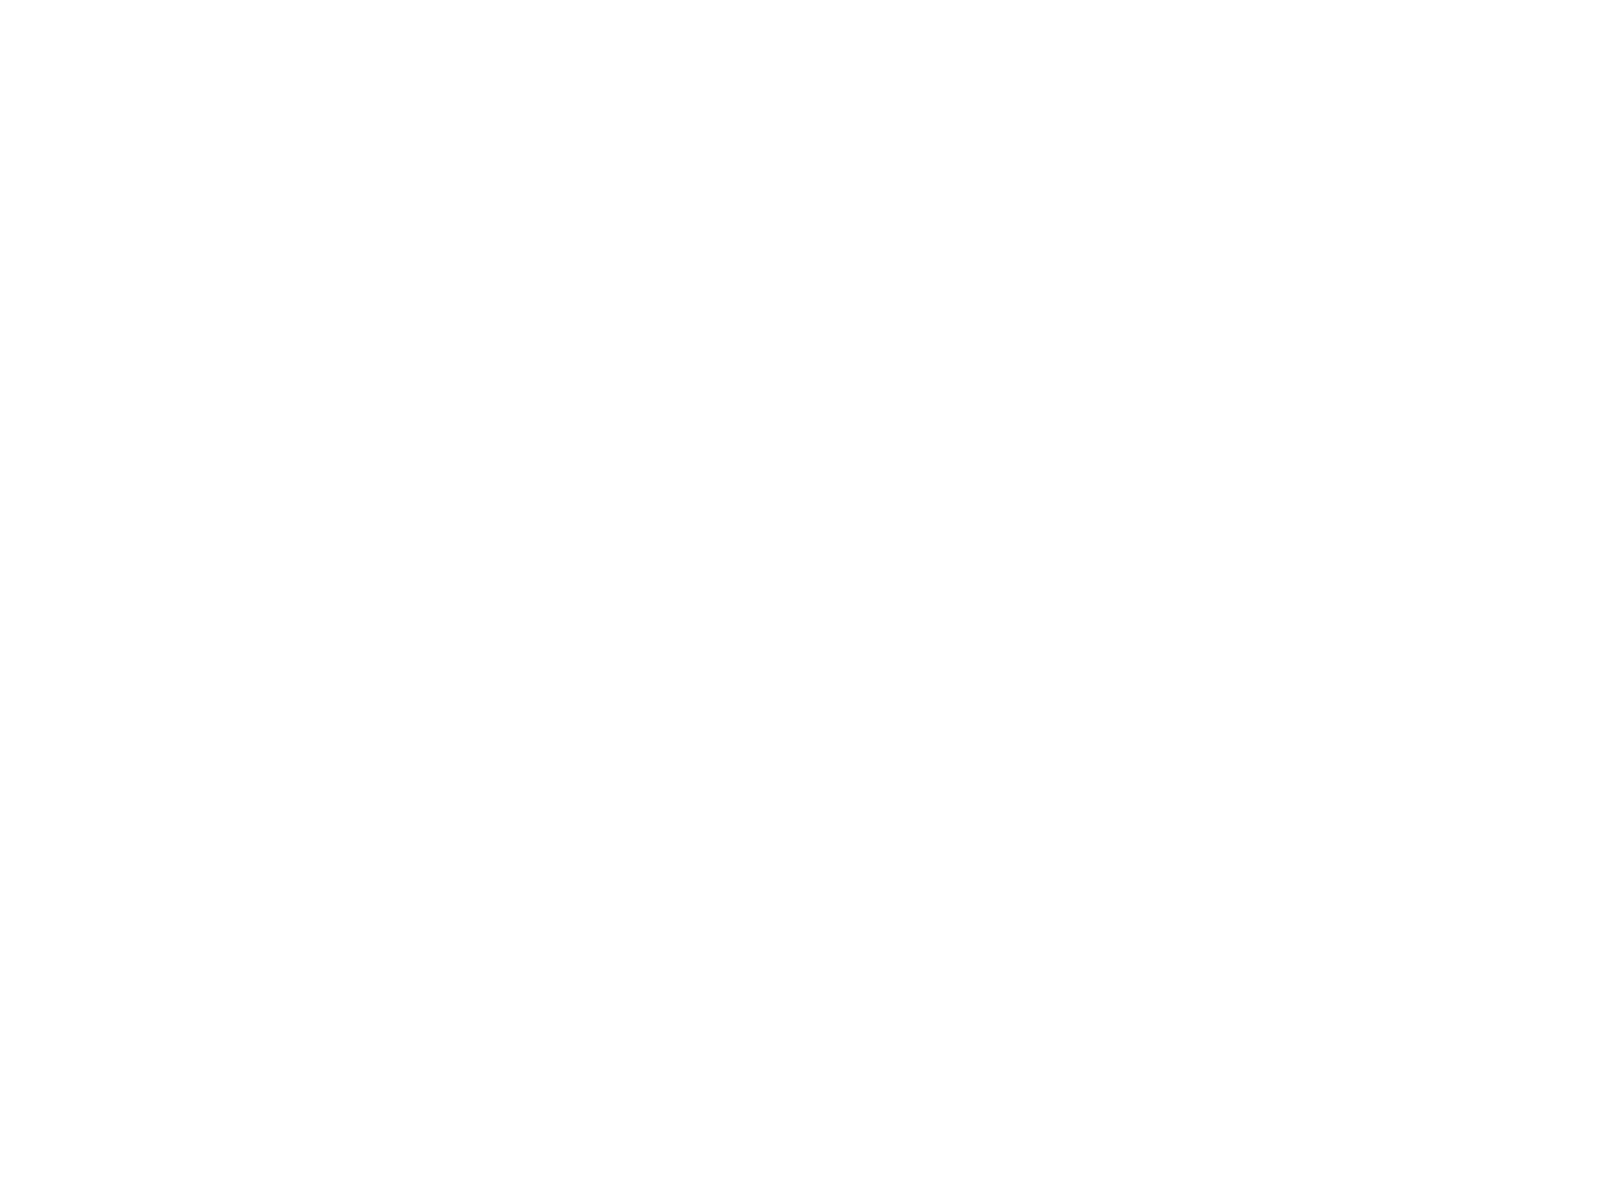

Count: 0,Before: (2047,),(2047,)
Flatten params: [ 4.43128076e-14 -1.77192935e-13  1.78087549e-13]
After: (1390,),(1390,)


In [9]:
# make sure you add statement for naming
plt.clf()
f,ax1 = plt.subplots(1,figsize=[16,12],facecolor='w')

count = 0
xmin1 = 1.9
xmax1=2.4
ymin = 0.5
start=False
ymax = 2.25
ax1.set_xlim(xmin1,xmax1)
ax1.set_ylabel(r"Relative Flux", fontsize = 25)
label = ax1.set_xlabel(r'Lambda ($\mu$m)', fontsize = 25)
plt.ylim(ymin,ymax)
hdulist = fits.open(listoffiles)
  
lam = hdulist[0].data[0,:]
flux = hdulist[0].data[1,:]
eflux = hdulist[0].data[2,:]
plotting2(ax1,xmin1,xmax1,lam,flux,source+"_order"+str(3),listoflines,count,start)

plt.draw()
ax1.legend(prop={'size': 15})
plt.savefig(source+'/'+source+'_combined.flat.pdf',dpi=1000)

# Binning

<IPython.core.display.Javascript object>


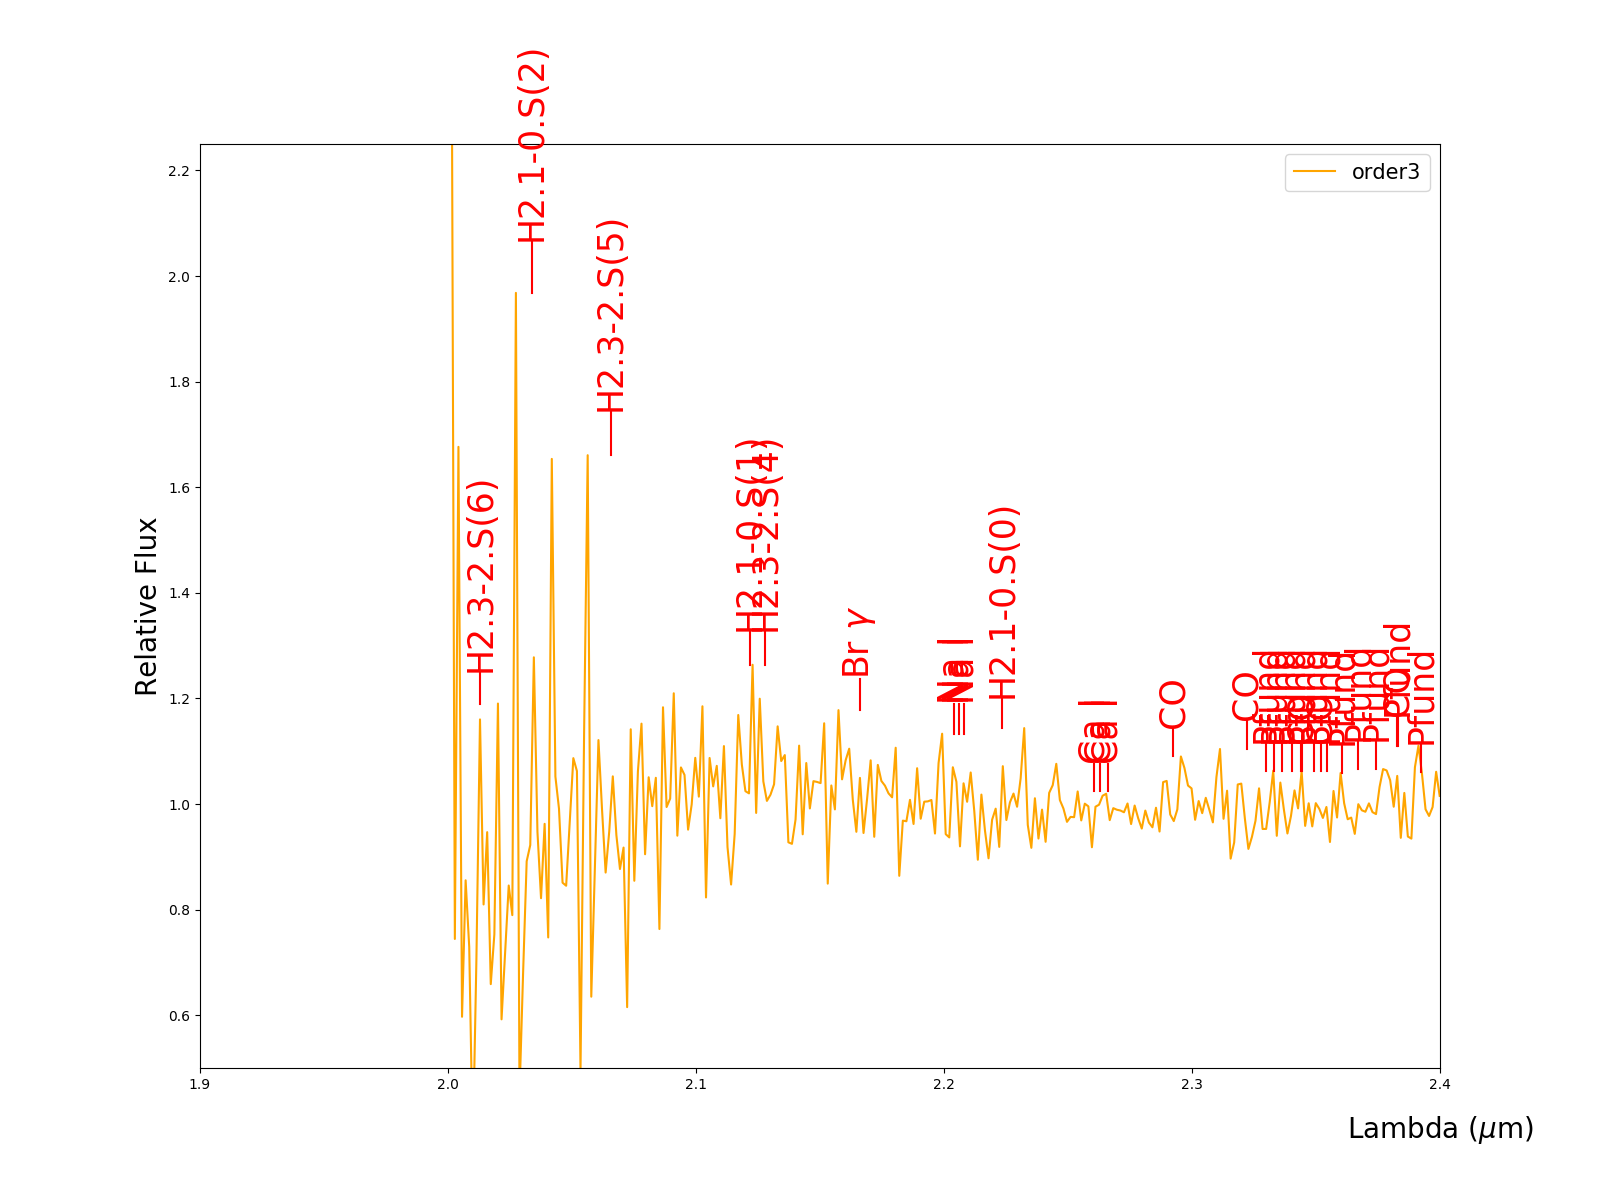

Count: 0,Before: (408,),(408,)
Flatten params: [ 4.43097590e-14 -1.77189389e-13  1.78094859e-13]
After: (278,),(278,)


In [13]:
plt.clf()
f,ax1 = plt.subplots(1, figsize=[16,12],facecolor='w')

count = 0

ax1.set_xlim(xmin1,xmax1)
ax1.set_ylabel(r"Relative Flux", fontsize = 20)
label = ax1.set_xlabel(r'Lambda ($\mu$m)', fontsize = 20)
ax1.xaxis.set_label_coords(1., -0.05)
plt.ylim(ymin,ymax)
hdulist = fits.open(listoffiles)

lam = binning(hdulist[0].data[0,:],5)
flux = binning(hdulist[0].data[1,:],5)
plotting2(ax1,xmin1,xmax1,lam,flux,source+"_order"+str(3),listoflines,count)

plt.draw()
ax1.legend(prop={'size': 15})
plt.savefig(source+'/'+source+'_combined.flat.binned.pdf',dpi=1000)